In [9]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset
import os


models = {

    # ### Smiling
    # "Lens": {
    #     "LR": {
    #         "24x32": "../celeba_lens_outdim768_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_23h58",
    #         "6x8": "../celeba_lens_outdim48_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_BinaryLogistic_01092022_15h15",
    #         "3x4": "../celeba_lens_outdim12_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_08h18",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_lens_outdim768_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_SingleHidden800_01092022_00h21",
    #         "6x8": "../celeba_lens_outdim48_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_SingleHidden800_01092022_15h37",
    #         "3x4": "../celeba_lens_outdim12_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_12h20",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     }
    # },
    # "CA": {
    #     "LR": {
    #         "24x32": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_14h37",
    #         "6x8": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_15h09",
    #         "3x4": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_15h40",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_18h39",
    #         "6x8": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_19h00",
    #         "3x4": "../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_19h18",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     }
    # },
    # "Diffuser": {
    #     "LR": {
    #         "24x32": "../celeba_tape_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_16h20",
    #         "6x8": "../celeba_tape_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_16h57",
    #         "3x4": "../celeba_tape_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_17h31",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_tape_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_19h36",
    #         "6x8": "../celeba_tape_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_19h56",
    #         "3x4": "../celeba_tape_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_20h14",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     }
    # },
    # "Fixed SLM (m)": {
    #     "LR": {
    #         "24x32": "../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_30082022_22h45",
    #         "6x8": "../celeba_adafruit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_09h02",
    #         "3x4": "../celeba_adafruit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_30082022_22h12",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_30082022_23h05",
    #         "6x8": "../celeba_adafruit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_20h32",
    #         "3x4": "../celeba_adafruit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_30082022_23h25",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     }
    # },
    # "Fixed SLM (s)": {
    #     "LR": {
    #         "24x32": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_09h33",
    #         "6x8": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_10h10",
    #         "3x4": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_BinaryLogistic_31082022_11h02",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_11h20",
    #         "6x8": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_11h42",
    #         "3x4": "../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Smiling_50epoch_seed0_SingleHidden800_31082022_12h01",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     }
    # },
    # "Learned SLM": {
    #     "LR": {
    #         "24x32": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim768_Smiling_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_31082022_09h59",
    #         "6x8": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim48_Smiling_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_01092022_19h12",
    #         "3x4": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim12_Smiling_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_01092022_22h43",
    #     },
    #     "FCNN": {
    #         "24x32": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim768_Smiling_50epoch_seed0_SLM_SingleHidden800_poisson40.0_01092022_00h04",
    #         "6x8": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim48_Smiling_50epoch_seed0_SLM_SingleHidden800_poisson40.0_01092022_07h23",
    #         "3x4": "../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim12_Smiling_50epoch_seed0_SLM_SingleHidden800_poisson40.0_01092022_11h09",
    #     },
    #     "2x, FCNN": {
    #         "24x32": "../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim768_Smiling_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_06092022_03h29",
    #         "6x8": "../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim48_Smiling_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_06092022_07h55",
    #         "3x4": "../",
    #     },
    #     "CNN": {
    #         "24x32": "../",
    #         "6x8": "../",
    #         "3x4": "../",
    #     },
    # },


    ### GENDER

    "Lens": {
        "LR": {
            "24x32": plib.Path("../celeba_lens_outdim768_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_08h20"),
            "6x8": plib.Path("../celeba_lens_outdim48_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_08h39"),
            "3x4": plib.Path("../celeba_lens_outdim12_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_08h55"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_lens_outdim768_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden800_03092022_08h36"),
            "6x8": plib.Path("../celeba_lens_outdim48_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden800_03092022_08h56"),
            "3x4": plib.Path("../celeba_lens_outdim12_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden800_03092022_09h13"),
        }
    },
    "CA": {
        "LR": {
            "24x32": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_09h20"),
            "6x8": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_09h48"),
            "3x4": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_10h13"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_09h30"),
            "6x8": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_09h50"),
            "3x4": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_10h07"),
        }
    },
    "Diffuser": {
        "LR": {
            "24x32": plib.Path("../celeba_tape_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_10h29"),
            "6x8": plib.Path("../celeba_tape_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_11h03"),
            "3x4": plib.Path("../celeba_tape_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_11h34"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_tape_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_10h24"),
            "6x8": plib.Path("../celeba_tape_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_10h44"),
            "3x4": plib.Path("../celeba_tape_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_11h00"),
        }
    },
    "Fixed SLM (m)": {
        "LR": {
            "24x32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_11h50"),
            "6x8": plib.Path("../celeba_adafruit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_12h22"),
            "3x4": plib.Path("../celeba_adafruit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_12h38"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_11h16"),
            "6x8": plib.Path("../celeba_adafruit_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_11h36"),
            "3x4": plib.Path("../celeba_adafruit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_11h53"),
        },
        # "CNN": {
        #     "24x32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC800_01092022_13h39"),
        #     "6x8": plib.Path("../"),
        #     "3x4": plib.Path("../"),
        # }
    },
    "Fixed SLM (s)": {
        "LR": {
            "24x32": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_13h08"),
            "6x8": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_13h42"),
            "3x4": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_BinaryLogistic_02092022_22h09"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_12h10"),
            "6x8": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim48_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_12h30"),
            "3x4": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_03092022_12h46"),
        }
    },
    "Learned SLM": {
        "LR": {
            "24x32": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim768_Male_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_02092022_22h34"),
            "6x8": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim48_Male_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_03092022_01h57"),
            "3x4": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim12_Male_50epoch_seed0_SLM_MultiClassLogistic_poisson40.0_03092022_05h17"),
        },
        "FCNN": {
            "24x32": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim768_Male_50epoch_seed0_SLM_SingleHidden800_poisson40.0_03092022_13h04"),
            "6x8": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim48_Male_50epoch_seed0_SLM_SingleHidden800_poisson40.0_03092022_16h23"),
            "3x4": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim12_Male_50epoch_seed0_SLM_SingleHidden800_poisson40.0_03092022_19h42"),
        },
        "2x, FCNN": {
            "24x32": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim768_Male_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_05092022_14h19"),
            "6x8": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim48_Male_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_05092022_18h43"),
            "3x4": plib.Path("../celeba_no_psf_down8_height0.27_NORM_100000files_scene2mask0.55_outdim12_Male_50epoch_seed0_SLM2_SingleHidden800_poisson40.0_05092022_23h07"),
        }

    }


    
    # # # -- down 64
    # "Lens": plib.Path("../celeba_lens_outdim2961_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_19082022_06h44"),
    # "Lens 64, hidden": plib.Path("../celeba_lens_outdim2961_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_08h38"),
    # "Lens, CNN": plib.Path("../celeba_lens_outdim2961_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_CNN10_16_24082022_01h52"),
    # # "Diffuser": plib.Path("../"),
    # # "Diffuser, hidden": plib.Path("../"),
    # # "Diffuser, CNN": plib.Path("../"),
    # "Fixed SLM (m)": plib.Path("../celeba_adafruit_outdim2961_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_18082022_16h55"),
    # "Fixed SLM (m), hidden": plib.Path("../celeba_adafruit_outdim2961_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_08h14"),
    # "Fixed SLM (m), CNN": plib.Path("../celeba_adafruit_outdim2961_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_CNN10_16_24082022_01h27"),
    # "Learned SLM ": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim2961_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_19082022_09h42"),
    # "Learned SLM 64, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim2961_50epoch_seed0_SLMSingleHidden1000_poisson40.0_22082022_09h25"),
    # "Leanred SLM, CNN": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim2961_50epoch_seed0_SLM_CNN_10_poisson40.0_24082022_02h44"),
    # "Learned SLM x4 64, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim2961_50epoch_seed0_SLM4_SingleHidden1000_poisson40.0_25082022_23h56"),

    # # -- down 128
    # "Lens 128": plib.Path("../celeba_lens_outdim713_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_20082022_07h52"),
    # "CA 128": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_11h03"),
    # "Diffuser 128": plib.Path("../celeba_tape_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_09h57"),
    # "Fixed SLM (m) 128": plib.Path("../celeba_adafruit_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_19082022_14h11"),
    # "Fixed SLM (s) 128": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_10h32"),
    # "Learned SLM 128": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim713_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_19082022_14h33"),

    # "Lens 128, hidden": plib.Path("../celeba_lens_outdim713_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_13h06"),
    # "CA 128, hidden": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_15h33"),
    # "Diffuser 128, hidden": plib.Path("../celeba_tape_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_13h26"),
    # "Fixed SLM (m) 128, hidden": plib.Path("../celeba_adafruit_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_12h46"),
    # "Fixed SLM (s) 128, hidden": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_15h12"),
    # "Learned SLM 128, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim713_50epoch_seed0_SLMSingleHidden1000_poisson40.0_22082022_13h47"),


    # "Lens 128, CNN": plib.Path("../celeba_lens_outdim713_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_CNN10_16_24082022_06h26"),
    # "Diffuser 128, CNN": plib.Path("../celeba_tape_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_CNN10_16_24082022_06h48"),
    # "Fixed SLM (m) 128, CNN": plib.Path("../celeba_adafruit_outdim713_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_CNN10_16_24082022_06h04"),
    # "Learned SLM 128, CNN": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim713_50epoch_seed0_SLM_CNN_10_poisson40.0_24082022_07h11"),
    # "Learned SLM 128 x4, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim713_50epoch_seed0_SLM4_SingleHidden1000_poisson40.0_26082022_09h42"),

    # # -- down 256
    # "Lens 256": plib.Path("../celeba_lens_outdim165_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_21082022_02h33"),
    # "CA 256": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_12h28"),
    # "Diffuser 256": plib.Path("../celeba_tape_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_11h23"),
    # "Fixed SLM (m) 256": plib.Path("../celeba_adafruit_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_20082022_09h06"),
    # "Fixed SLM (s) 256": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_11h59"),
    # "Learned SLM 256": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim165_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_20082022_09h24"),

    # "Lens 256, hidden": plib.Path("../celeba_lens_outdim165_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_17h20"),
    # "CA 256, hidden": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_16h32"),
    # "Diffuser 256, hidden": plib.Path("../celeba_tape_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_15h54"),
    # "Fixed SLM (m) 256, hidden": plib.Path("../celeba_adafruit_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_22082022_17h02"),
    # "Fixed SLM (s) 256, hidden": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim165_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_16h13"),
    # "Learned SLM 256, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim165_50epoch_seed0_SLMSingleHidden1000_poisson40.0_22082022_17h57"),
    # "Learned SLM 256 x4, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim165_50epoch_seed0_SLM4_SingleHidden1000_poisson40.0_26082022_19h12"),

    # # # -- 512
    # "Lens 512": plib.Path("../celeba_lens_outdim35_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_BinaryLogistic_23082022_15h24"),
    # "CA 512": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_14h44"),
    # "Diffuser 512": plib.Path("../celeba_tape_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_14h00"),
    # "Fixed SLM (m) 512": plib.Path("../celeba_adafruit_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_22082022_21h37"),
    # "Fixed SLM (s) 512": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_BinaryLogistic_30082022_14h16"),
    # "Learned SLM 512": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim35_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_22082022_21h54"),
    
    # # "Lens 512, hidden": plib.Path("../celeba_lens_outdim35_height0.27_scene2mask0.55_poisson40.0_croppsf100_100000files_Male_50epoch_seed0_SingleHidden1000_23082022_19h44"),
    # # "CA 512, hidden": plib.Path("../celeba_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_16h51"),
    # # "Diffuser 512, hidden": plib.Path("../celeba_tape_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_13h04"),
    # "Fixed SLM (m) 512, hidden": plib.Path("../celeba_adafruit_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_23082022_15h40"),
    # # "Fixed SLM (s) 512, hidden": plib.Path("../celeba_simulated_adafruit_deadspaceTrue_15052022_21h04_outdim35_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_13h38"),
    # "Learned SLM 512, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim35_50epoch_seed0_SLMSingleHidden1000_poisson40.0_23082022_15h58"),
    # # "Learned SLM 512 x4, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim35_50epoch_seed0_SLM4_SingleHidden1000_poisson40.0_27082022_04h41"),


    # # # 768
    # "800": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_01092022_11h05"),
    # # # "800 b32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_01092022_11h57"),
    # # # "800 b300": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_SingleHidden800_01092022_13h18"),

    # ## 768 CNN
    # # "5 0": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite5_FC0_01092022_14h57"),
    # # "10 0": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC0_01092022_15h05"),
    # # "5 50": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite5_FC50_01092022_14h13"),
    # # "5 50, 2": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite5_FC50_01092022_15h51"),
    # "10 25": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC25_01092022_16h12"),
    # "10 50": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC50_01092022_14h30"),
    # "10 50, kernel size 5": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC50_01092022_16h32"),
    # "800 300": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_TwoHidden800_300_01092022_17h58"),
    # # "10 100": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC100_01092022_15h58"),
    # # "10 200": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC200_01092022_15h26"),
    # # "10 800":plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC800_01092022_11h00"),
    # # "15 800":plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite15_FC800_01092022_11h26"),
    # # "10 800 b32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC800_01092022_12h28"),
    # # "15 800 b32": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite15_FC800_01092022_12h57"),
    # # "10 800 b300": plib.Path("../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000files_Male_50epoch_seed0_CNNLite10_FC800_01092022_13h39"),

    # # 3x4
    # "Fixed SLM (m) 3x4, hidden": plib.Path("../celeba_adafruit_outdim12_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_100000files_Male_50epoch_seed0_SingleHidden1000_30082022_17h34"),
    # "Learned SLM 3x4, hidden": plib.Path("../celeba_no_psf_down8_height0.27_100000files_scene2mask0.55_outdim12_50epoch_seed0_SLM_SingleHidden1000_poisson40.0_30082022_17h59"),
}

Learned SLM, LR, 24x32 - best accuracy in 50 epochs : 0.896
Learned SLM, LR, 6x8 - best accuracy in 50 epochs : 0.883
Learned SLM, LR, 3x4 - best accuracy in 50 epochs : 0.87
Learned SLM, FCNN, 24x32 - best accuracy in 50 epochs : 0.913
Learned SLM, FCNN, 6x8 - best accuracy in 50 epochs : 0.897
Learned SLM, FCNN, 3x4 - best accuracy in 50 epochs : 0.885
Learned SLM, 2x, FCNN, 24x32 - best accuracy in 50 epochs : 0.915
Learned SLM, 2x, FCNN, 6x8 - best accuracy in 50 epochs : 0.903
Learned SLM, 2x, FCNN, 3x4 - best accuracy in 50 epochs : 0.889


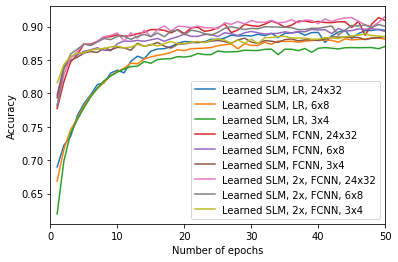

In [10]:
cam_filt = None
cam_filt = ["Learned SLM"]
arch_filt = None
# arch_filt = ["FCNN", "CNN"]
dim_filt = None
# dim_filt = ["24x32"]


for cam in models.keys():
    if cam_filt is not None:
        if cam not in cam_filt:
            continue
    for arch in models[cam].keys():
        if arch_filt is not None:
            if arch not in arch_filt:
                continue
        for dim in models[cam][arch].keys():
            if dim_filt is not None:
                if dim not in dim_filt:
                    continue
            _label = f"{cam}, {arch}, {dim}"
            model_path = plib.Path(models[cam][arch][dim])
            test_acc_fp = str(model_path / "test_acc.npy")
            if os.path.exists(test_acc_fp):
                test_acc = np.load(test_acc_fp)
                n_epoch = np.arange(len(test_acc)) + 1
                print(f"{_label} - best accuracy in {len(n_epoch)} epochs : {round(np.max(test_acc), 3)}")
                plt.plot(n_epoch,  test_acc, label=_label)
            else:
                print(f"{_label} - {test_acc_fp} does not exist")
            
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);
            

In [13]:
# compute performance drop
for cam in models.keys():
    for arch in models[cam].keys():
        model_dict = models[cam][arch]
        fp1 = str(plib.Path(model_dict["24x32"]) / "test_acc.npy")
        fp2 = str(plib.Path(model_dict["3x4"]) / "test_acc.npy")
        if os.path.exists(fp1) and os.path.exists(fp2):
            val1 = np.max(np.load(fp1))
            val2 = np.max(np.load(fp2))
            drop = 1. - val2 / val1
            print(f"{cam}, {arch} : {round(drop, 6)}")

Lens, LR : 0.303066
Lens, FCNN : 0.306775
CA, LR : 0.200743
CA, FCNN : 0.267909
Diffuser, LR : 0.188638
Diffuser, FCNN : 0.221605
Fixed SLM (m), LR : 0.266606
Fixed SLM (m), FCNN : 0.212642
Fixed SLM (s), LR : 0.242516
Fixed SLM (s), FCNN : 0.240346
Learned SLM, LR : 0.028433
Learned SLM, FCNN : 0.030728


#### with big dictionary

In [23]:
for m in models.keys():
    test_acc = np.load(str(models[m] / "test_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {round(np.max(test_acc), 3)}", len(n_epoch))
    plt.plot(n_epoch,  test_acc, label=m)
plt.legend()
# plt.ylim([0.86, 0.91])
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);

TypeError: unsupported operand type(s) for /: 'dict' and 'str'

Learned SLM, LR, 24x32 : 0.876 50
Learned SLM, LR, 6x8 : 0.878 50
Learned SLM, LR, 3x4 : 0.869 50


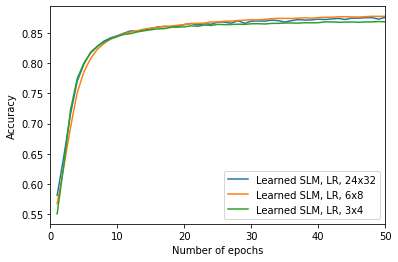

In [6]:
for m in models.keys():
    test_acc = np.load(str(models[m] / "train_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {round(np.max(test_acc), 3)}", len(n_epoch))
    plt.plot(n_epoch,  test_acc, label=m)
plt.legend()
# plt.ylim([0.86, 0.91])
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);

# prev stuff

In [ ]:
models = {
    ## - DOWN ORIG 4
    "original": plib.Path("../CelebA_original_40epoch_seed0_BinaryLogistic_02052022_22h27"),
    "lens": plib.Path("../celeba_lens_outdim2352_height0.27_scene2mask0.55_speckle40.0_croppsf100_202599files_50epoch_seed0_BinaryLogistic_05052022_07h21"),
    # "tape": plib.Path("../celeba_tape_outdim2352_height0.27_scene2mask0.55_speckle40.0_202599files_50epoch_seed0_BinaryLogistic_05052022_16h58"),
    # "tape_cont": plib.Path("../celeba_tape_outdim2352_height0.27_scene2mask0.55_speckle40.0_202599files_50epoch_seed0_BinaryLogistic_05052022_20h16"),
    "diffuser": plib.Path("../celeba_tape_outdim2352_height0.27_scene2mask0.55_speckle40.0_202599files_50epoch_seed0_BinaryLogistic_05052022_22h59"),
    "learned_slm": plib.Path("../celeba_no_psf_down8_height0.27_202599files_scene2mask0.55_outdim2352_50epoch_seed0_SLMMultiClassLogistic_speckle40.0_05052022_13h43"),

    ## - DOWN ORIG 8
    "original_8": plib.Path("../CelebA_original_50epoch_seed0_BinaryLogistic_07052022_22h58"),

    ## - DOWN ORIG 16
    "original_16": plib.Path("../CelebA_original_50epoch_seed0_BinaryLogistic_08052022_02h35"),

    # ## - DOWN ORIG 32
    # "original_32": plib.Path("../CelebA_original_downorig32.0_50epoch_seed0_BinaryLogistic_08052022_13h56"),

    # ## - DOWN ORIG 24
    # "original_24": plib.Path("../CelebA_original_downorig24.0_50epoch_seed0_BinaryLogistic_08052022_17h27"),

    # ## - DOWN ORIG 20 - PAUSED!!
    # "original_20": plib.Path("../CelebA_original_downorig20.0_50epoch_seed0_BinaryLogistic_08052022_23h45"),


}

original : 0.027941757738590242
lens : 0.11451456658542157
diffuser : 0.18341529414057728
learned_slm : 0.14711269609630104
original_8 : 0.04044069334864615
original_16 : 0.062483558580279354


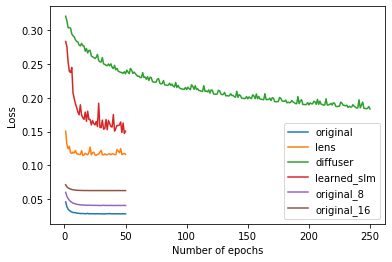

In [4]:
# load and plot error plots
for m in models.keys():
    test_loss = np.load(str(models[m] / "test_loss.npy"))
    n_epoch = np.arange(len(test_loss)) + 1
    print(f"{m} : {np.min(test_loss)}")
    plt.plot(n_epoch,  test_loss, label=m)
plt.legend()
plt.ylabel("Loss")
# plt.xlim([0, 50])
plt.xlabel("Number of epochs");

original : 0.9151036739349365
lens : 0.9138697385787964
diffuser : 0.8667324781417847
learned_slm : 0.8867226243019104
original_8 : 0.873494565486908
original_16 : 0.7693485021591187


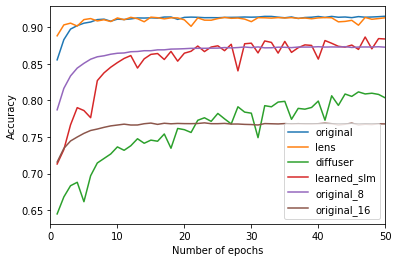

In [5]:
for m in models.keys():
    test_acc = np.load(str(models[m] / "test_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {np.max(test_acc)}")
    plt.plot(n_epoch,  test_acc, label=m)
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);

# Smiling

In [15]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset


models = {
    # "original8_batch128": plib.Path("../CelebA_original_downorig8.0_20epoch_seed0_BinaryLogistic_11052022_22h06"),
    # "original8_batch64": plib.Path("../CelebA_original_downorig8.0_20epoch_seed0_BinaryLogistic_11052022_21h52"),
    # "original8_batch200": plib.Path("../CelebA_original_Smiling_downorig8.0_20epoch_seed0_BinaryLogistic_11052022_22h31"),
    # "original16_batch200": plib.Path("../CelebA_original_Smiling_downorig16.0_20epoch_seed0_BinaryLogistic_11052022_22h47"),
    # "original32_batch200": plib.Path("../CelebA_original_Smiling_downorig32.0_20epoch_seed0_BinaryLogistic_11052022_23h05"),

    # # batch 200
    # "adafruit32": plib.Path("../celeba_adafruit_outdim30_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_BinaryLogistic_12052022_00h07"),
    # "original32": plib.Path("../CelebA_original_Smiling_downorig32.0_20epoch_seed0_BinaryLogistic_12052022_01h06"),
    # "tape30": plib.Path("../celeba_tape_outdim30_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_BinaryLogistic_12052022_01h01"),

    # # - logistic reg
    # "adafruit16": plib.Path("../celeba_adafruit_outdim140_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_BinaryLogistic_12052022_06h33"),
    # "diffuser16": plib.Path("../celeba_tape_outdim140_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_BinaryLogistic_12052022_07h28"),
    # "original16": plib.Path("../CelebA_original_Smiling_downorig16.0_20epoch_seed0_BinaryLogistic_12052022_07h33"),

    # - single hidden
    "original16_500": plib.Path("../CelebA_original_Smiling_downorig16.0_20epoch_seed0_SingleHidden500_12052022_08h30"),
    "adafruit16_500": plib.Path("../celeba_adafruit_outdim140_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_SingleHidden500_12052022_08h21"),
    "tape16_500": plib.Path("../celeba_tape_outdim140_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_50000files_Smiling_20epoch_seed0_SingleHidden500_12052022_08h24"),
    "learned_slm16_500": plib.Path("../celeba_no_psf_down8_height0.27_50000files_scene2mask0.55_outdim140_20epoch_seed0_SLMSingleHidden500_poisson40.0_12052022_12h49"),

}

original16_500 : 0.8371999859809875
adafruit16_500 : 0.8235999941825867
tape16_500 : 0.7980000376701355
learned_slm16_500 : 0.7249999642372131


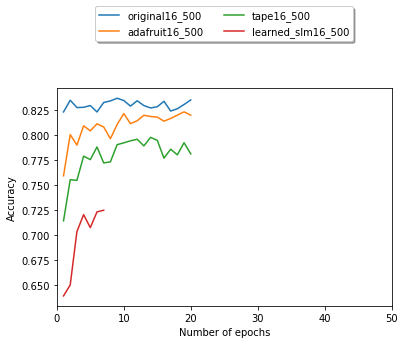

In [20]:
ax = plt.subplot(111)
for m in models.keys():
    test_acc = np.load(str(models[m] / "test_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {np.max(test_acc)}")
    ax.plot(n_epoch,  test_acc, label=m)
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=2, fancybox=True, shadow=True)